In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [2]:
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
# Carregar o dataset
df = pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Intelig-ncia-Artificial-e-Big-Data--2-2024/refs/heads/master/Bases%20de%20dados/dados_produtos.csv')

In [49]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [51]:
# Cálculo da média de avaliações por produto
media_por_produto = df.groupby('product_name').apply(lambda x: x['rating'].mean()).reset_index(name='media_rating')
print(media_por_produto)

  product_name  media_rating
0    Cafeteira      3.747778
1      Celular      3.949524
2     Notebook      4.074375
3    Televisão      4.002632
4    Videogame      4.314118
5         iPod      4.135556


C:\Users\dsadm\AppData\Local\Temp\ipykernel_8552\1232905830.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  media_por_produto = df.groupby('product_name').apply(lambda x: x['rating'].mean()).reset_index(name='media_rating')


C:\Users\dsadm\AppData\Local\Temp\ipykernel_8552\1323507730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_name', y='rating', data=df, palette='Set2')


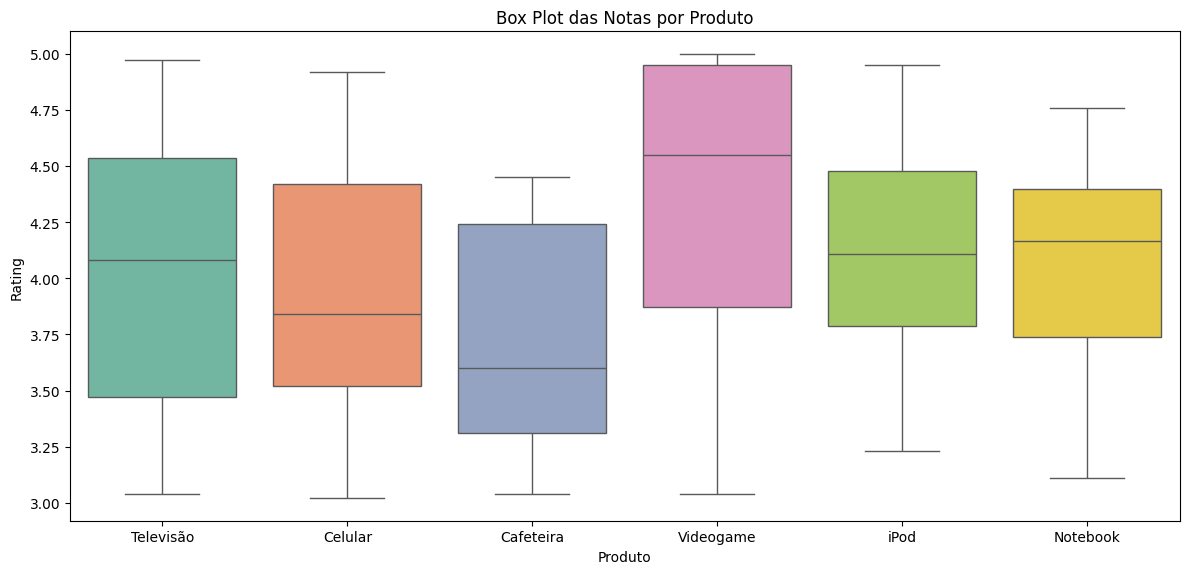

In [50]:
# Box plot das notas para verificar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_name', y='rating', data=df, palette='Set2')
plt.suptitle('')
plt.title('Box Plot das Notas por Produto')
plt.xlabel('Produto')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

In [31]:
# Informaçõs do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [52]:
# Estatísticas descritivas do Dataset
print(df.describe())

           rating  rating_count  purchased
count  100.000000    100.000000     100.00
mean     4.056900   2536.670000       0.55
std      0.588344   1458.312544       0.50
min      3.020000     10.000000       0.00
25%      3.580000   1433.250000       0.00
50%      4.105000   2424.000000       1.00
75%      4.505000   3773.000000       1.00
max      5.000000   4977.000000       1.00


In [54]:
# Verificar valores nulos
print(df.isnull().sum())

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64


In [ ]:
print(f"\nTotal de duplicados: {df.duplicated().sum()}")


Total de duplicados: 0


In [55]:
# Remover duplicados
df = df.drop_duplicates()

In [36]:
print(df['purchased'].value_counts())

purchased
1    55
0    45
Name: count, dtype: int64


In [57]:
# Definir variáveis independentes (X) e dependente (y)
X = df[['rating', 'rating_count']]
y = df['purchased']


In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDados de treino: {X_train.shape[0]} registros")
print(f"Dados de teste: {X_test.shape[0]} registros")


Dados de treino: 80 registros
Dados de teste: 20 registros


In [59]:
# Criar modelos de árvore de decisão para cada produto
produtos = df['product_name'].unique()
modelos = {}

for produto in produtos:
    modelos[produto] = DecisionTreeClassifier(random_state=42)
    print(f"Modelo criado para: {produto}")

Modelo criado para: Televisão
Modelo criado para: Celular
Modelo criado para: Cafeteira
Modelo criado para: Videogame
Modelo criado para: iPod
Modelo criado para: Notebook


In [60]:
# Treinar modelos para cada produto
resultados = {}

for produto in produtos:
    # Filtrar dados do produto
    df_produto = df[df['product_name'] == produto]
    
    # Separar X e y
    X_prod = df_produto[['rating', 'rating_count']]
    y_prod = df_produto['purchased']
    
    # Dividir treino/teste
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
        X_prod, y_prod, test_size=0.2, random_state=42
    )
    # Treinar modelo
    modelos[produto].fit(X_train_p, y_train_p)
    
    # Guardar dados para avaliação
    resultados[produto] = {
        'X_test': X_test_p,
        'y_test': y_test_p
    }
    
    print(f"Modelo treinado para {produto}: {len(X_train_p)} treino, {len(X_test_p)} teste")

Modelo treinado para Televisão: 15 treino, 4 teste
Modelo treinado para Celular: 16 treino, 5 teste
Modelo treinado para Cafeteira: 7 treino, 2 teste
Modelo treinado para Videogame: 13 treino, 4 teste
Modelo treinado para iPod: 14 treino, 4 teste
Modelo treinado para Notebook: 12 treino, 4 teste


In [61]:
# Avaliar modelos
for produto in produtos:
    # Fazer predições
    y_pred = modelos[produto].predict(resultados[produto]['X_test'])
    y_true = resultados[produto]['y_test']
    
    # Calcular métricas
    precisao = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    matriz = confusion_matrix(y_true, y_pred)
    
    # Salvar métricas
    resultados[produto]['metricas'] = {
        'precisao': precisao,
        'recall': recall,
        'f1_score': f1,
        'matriz_confusao': matriz
    }
    
    # Exibir resultados
    print(f"\n PRODUTO: {produto}")
    print(f"   Precisão:  {precisao:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    print(f"   Matriz de Confusão:")
    print(f"   {matriz}")


 PRODUTO: Televisão
   Precisão:  1.0000
   Recall:    0.3333
   F1-Score:  0.5000
   Matriz de Confusão:
   [[1 0]
 [2 1]]

 PRODUTO: Celular
   Precisão:  0.5000
   Recall:    1.0000
   F1-Score:  0.6667
   Matriz de Confusão:
   [[1 2]
 [0 2]]

 PRODUTO: Cafeteira
   Precisão:  0.0000
   Recall:    0.0000
   F1-Score:  0.0000
   Matriz de Confusão:
   [[1 0]
 [1 0]]

 PRODUTO: Videogame
   Precisão:  1.0000
   Recall:    1.0000
   F1-Score:  1.0000
   Matriz de Confusão:
   [[4]]

 PRODUTO: iPod
   Precisão:  0.5000
   Recall:    0.5000
   F1-Score:  0.5000
   Matriz de Confusão:
   [[1 1]
 [1 1]]

 PRODUTO: Notebook
   Precisão:  0.5000
   Recall:    1.0000
   F1-Score:  0.6667
   Matriz de Confusão:
   [[2 1]
 [0 1]]


C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


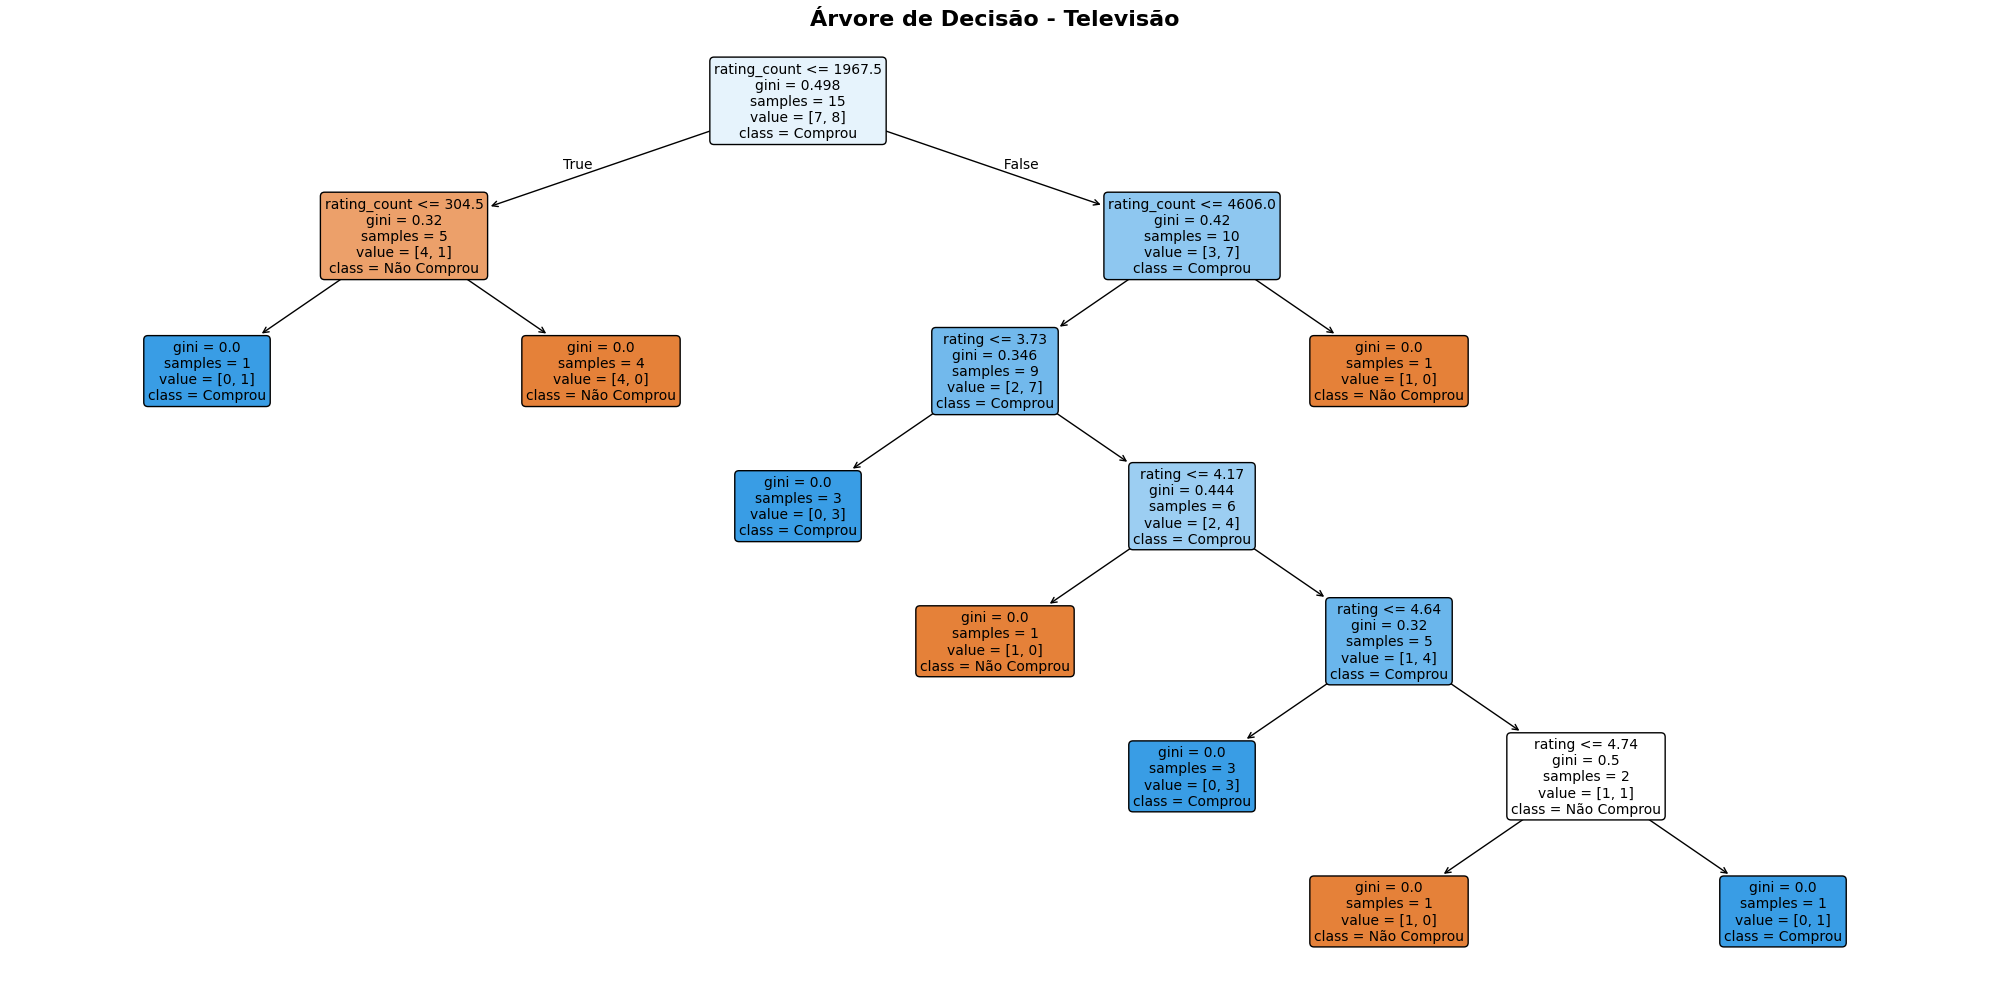

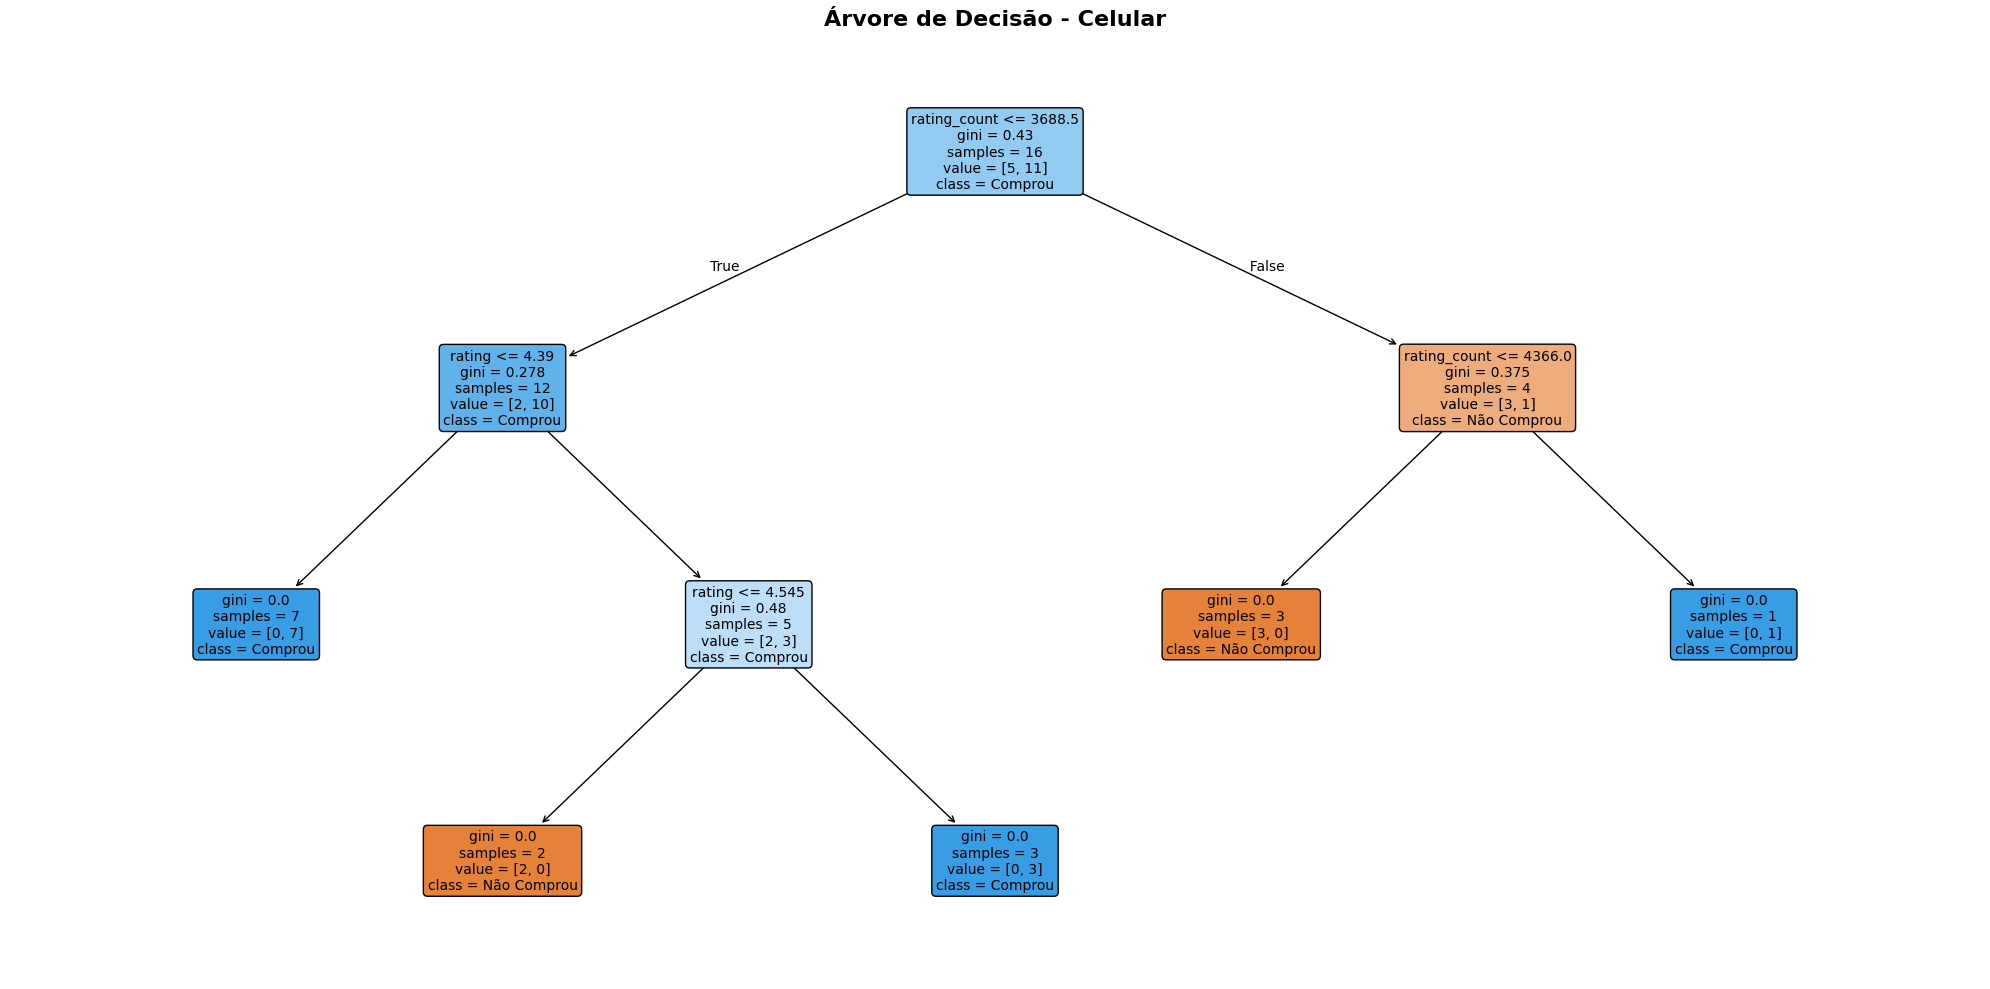

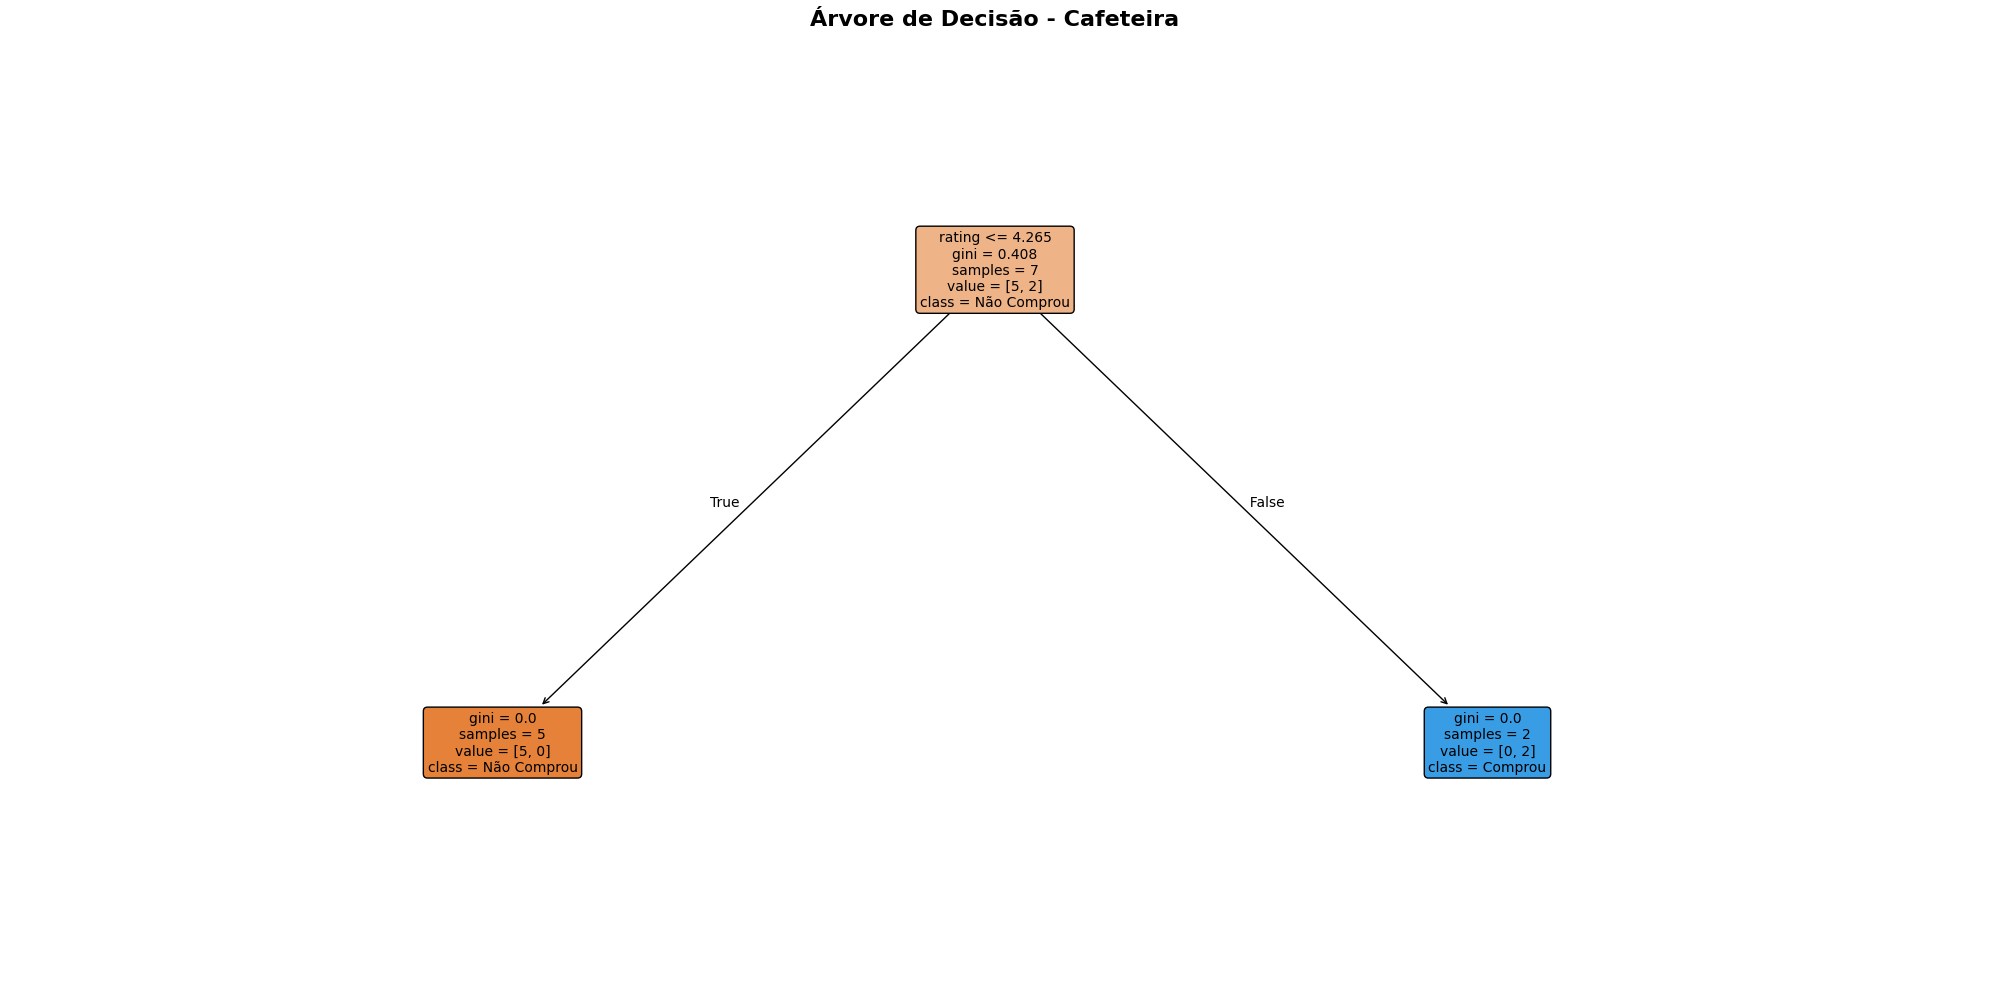

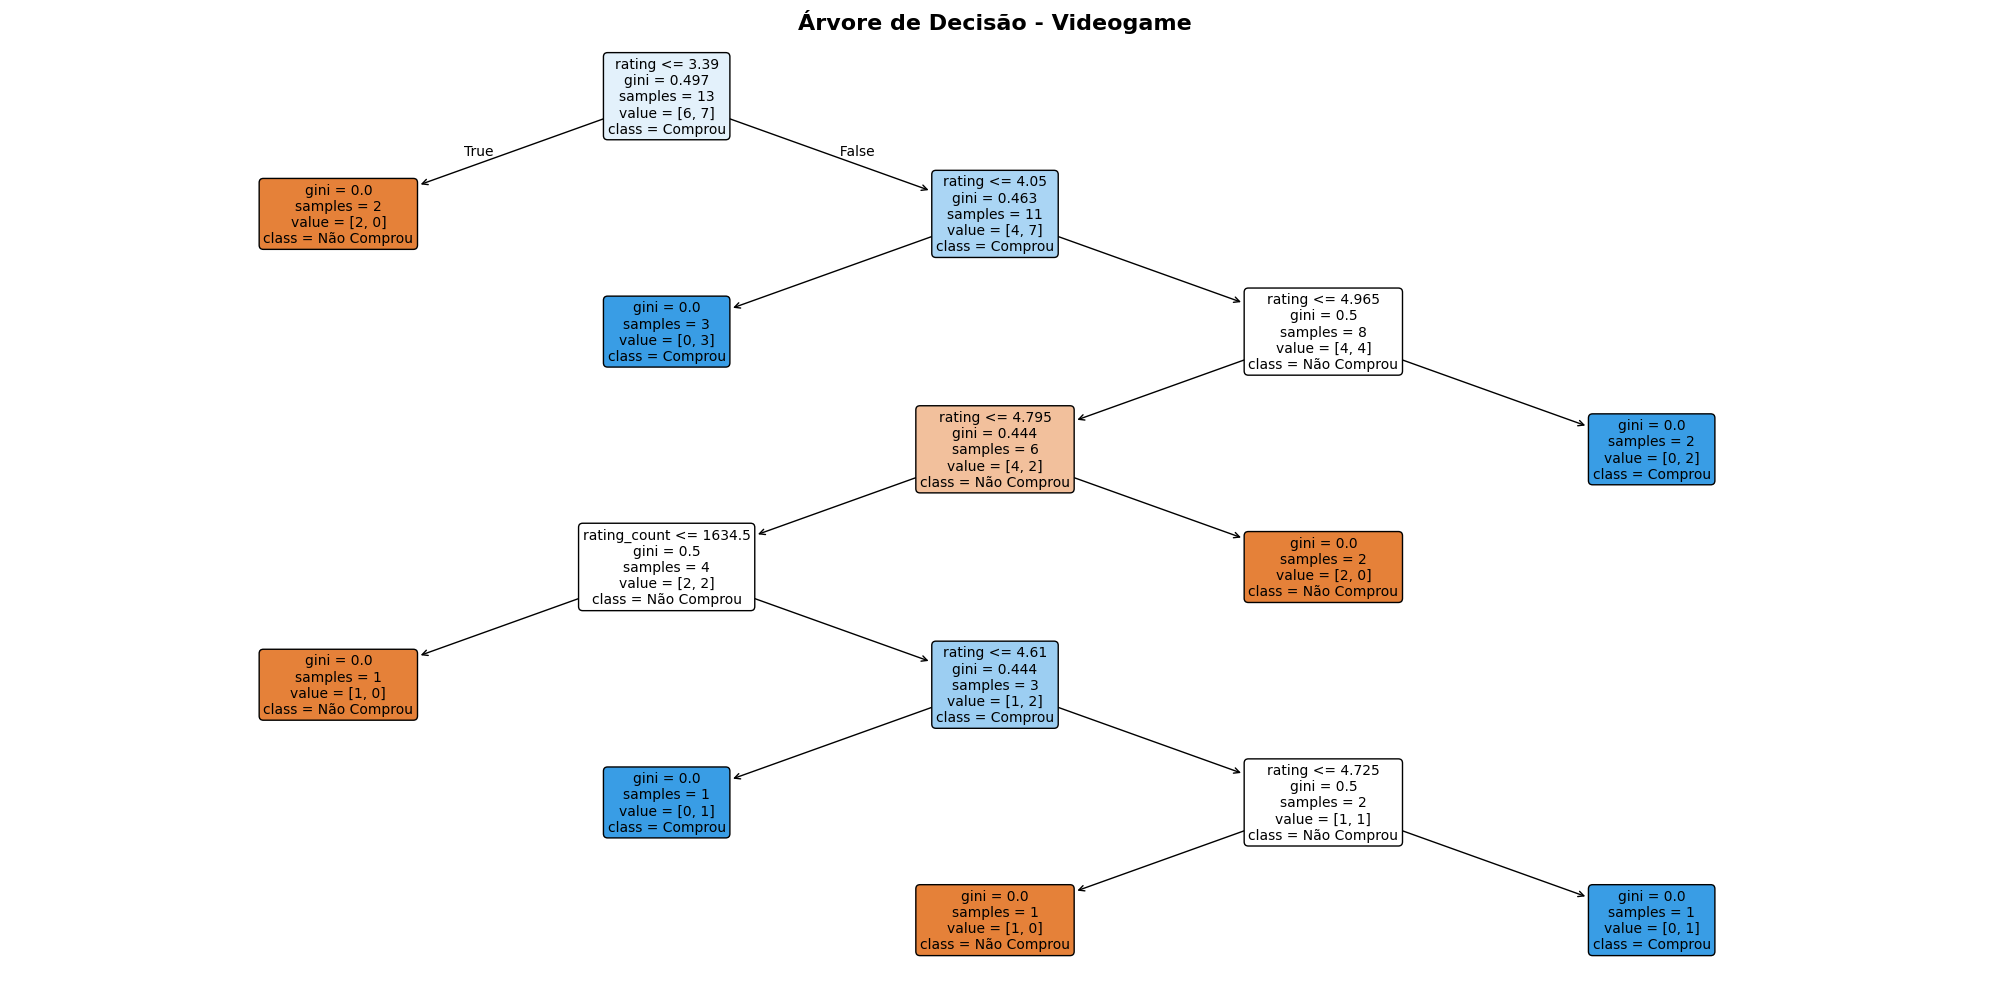

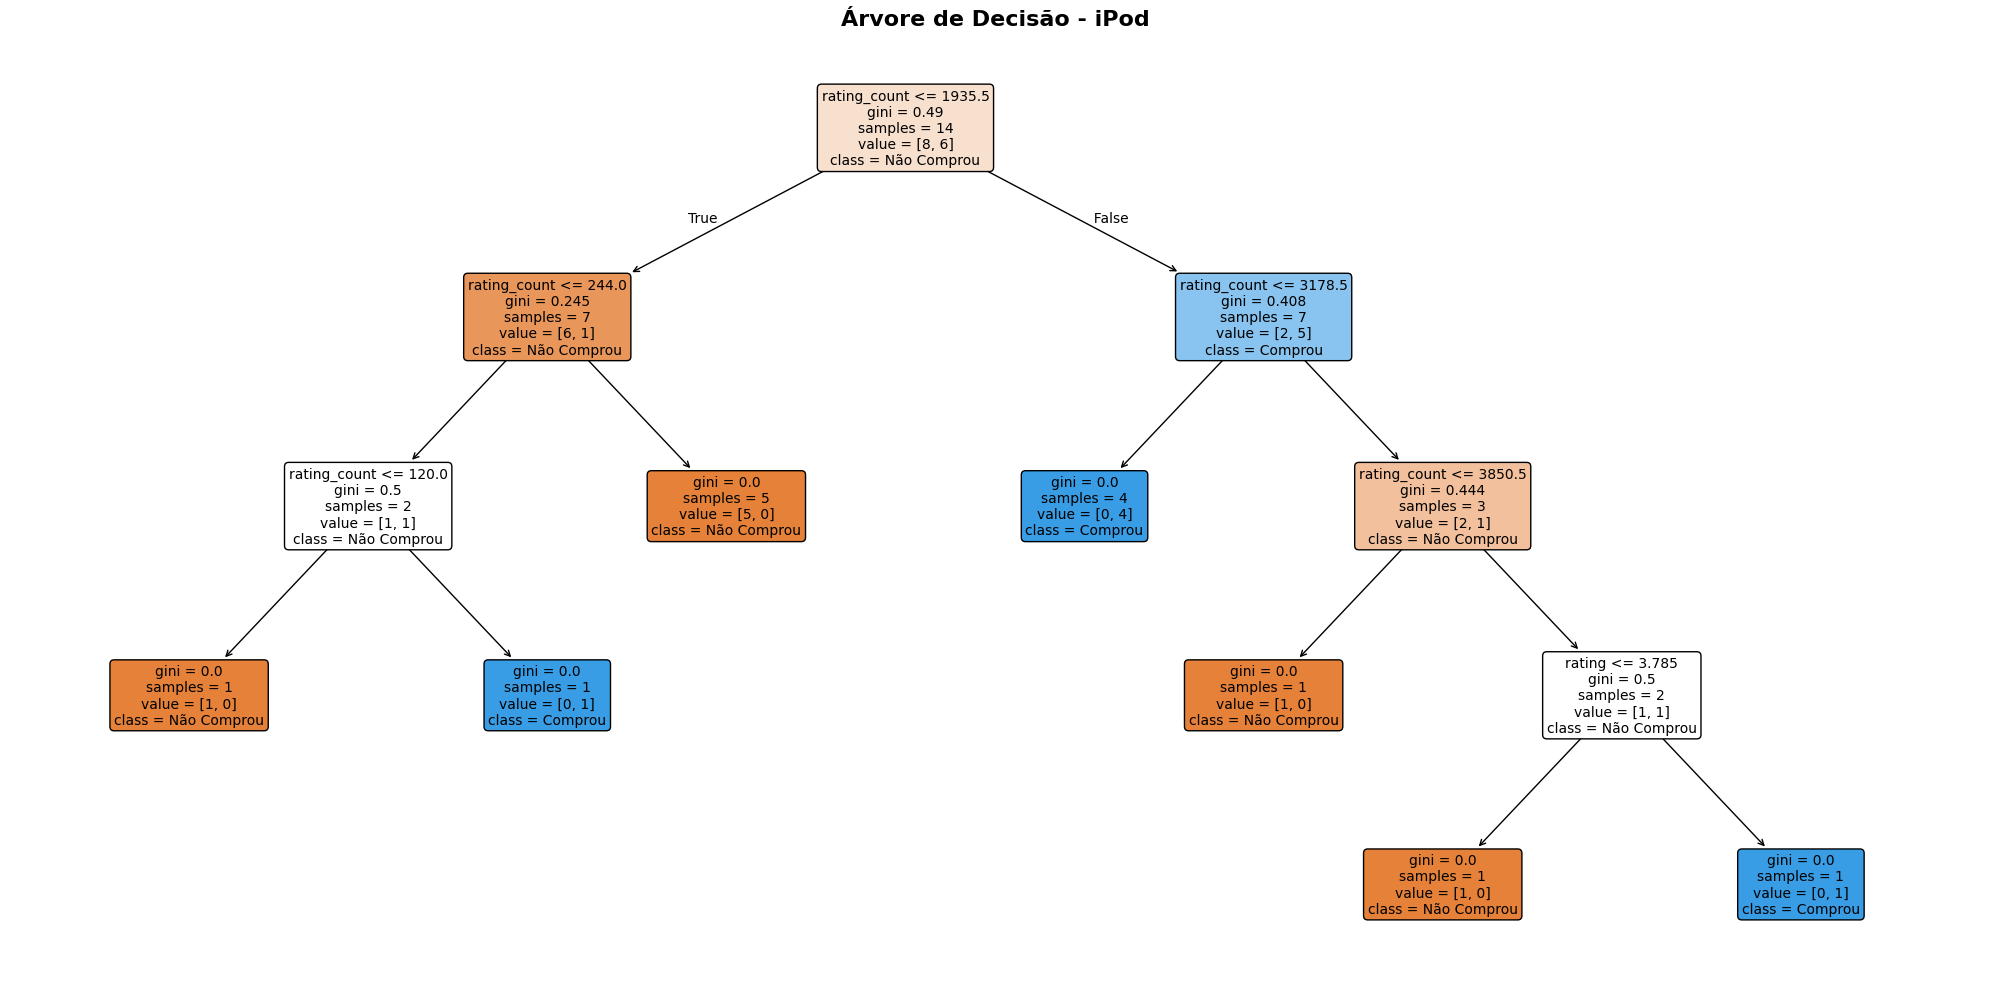

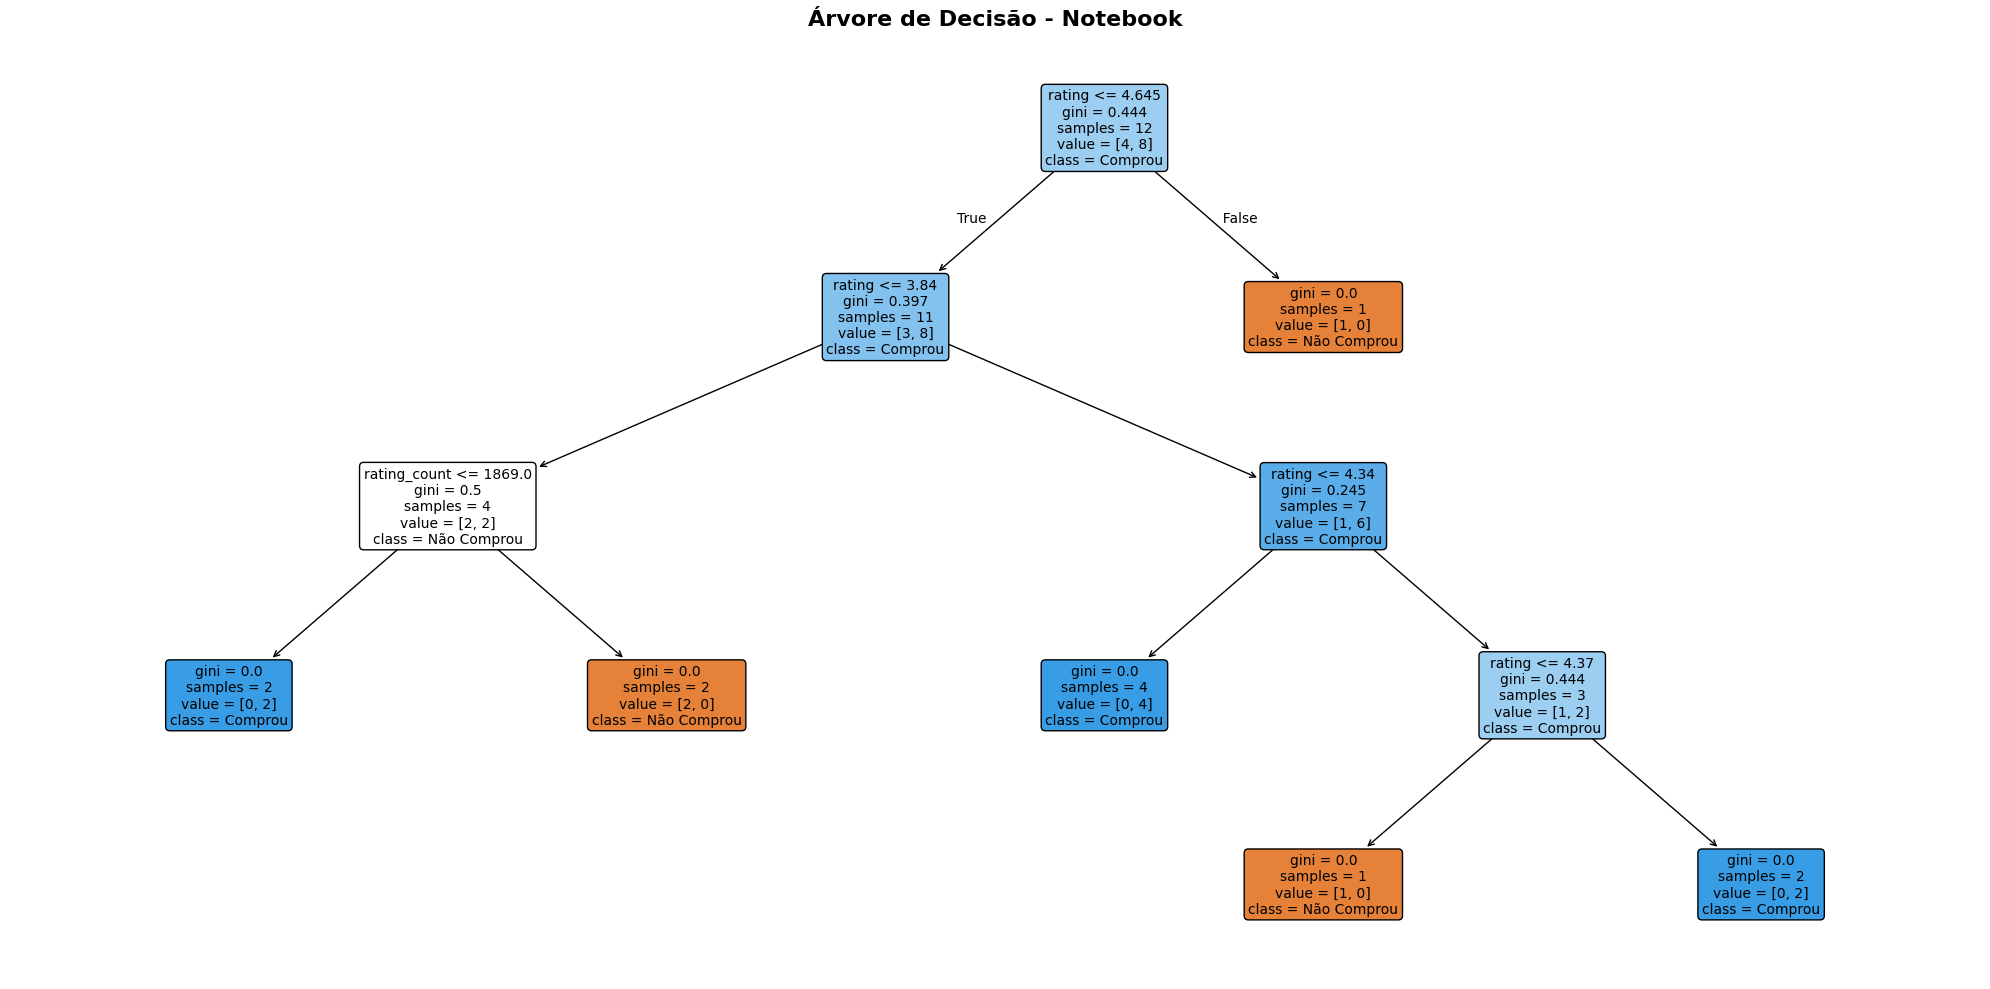

In [62]:
# Visualizar árvores de decisão
for produto in produtos:
    plt.figure(figsize=(20, 10))
    plot_tree(
        modelos[produto],
        feature_names=['rating', 'rating_count'],
        class_names=['Não Comprou', 'Comprou'],
        filled=True,
        rounded=True,
        fontsize=10
    )
    plt.title(f'Árvore de Decisão - {produto}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [47]:
print("CONCLUSÃO")
print("""
Os modelos de Árvore de Decisão desenvolvidos demonstram que é possível prever compras com base em avaliações, mas com limitações significativas. O modelo funcionou melhor para alguns produtos como o Celular e falhou completamente para outros como a Cafeteira.
Para uso em produção na empresa S&M Data Analytics, recomenda-se:
Implementar os modelos de Celular e Televisão com monitoramento constante;
Não implementar o modelo de Cafeteira até melhorias substanciais;
Investir em coleta de dados adicionais e engenharia de features;
Testar algoritmos mais robustos antes da implantação definitiva.

A abordagem inicial foi válida como prova de conceito, mas são necessários ajustes para atingir um sistema de recomendação confiável e eficaz
""")

CONCLUSÃO

Os modelos de Árvore de Decisão desenvolvidos demonstram que é possível prever compras com base em avaliações, mas com limitações significativas. O modelo funcionou melhor para alguns produtos como o Celular e falhou completamente para outros como a Cafeteira.
Para uso em produção na empresa S&M Data Analytics, recomenda-se:
Implementar os modelos de Celular e Televisão com monitoramento constante;
Não implementar o modelo de Cafeteira até melhorias substanciais;
Investir em coleta de dados adicionais e engenharia de features;
Testar algoritmos mais robustos antes da implantação definitiva.

A abordagem inicial foi válida como prova de conceito, mas são necessários ajustes para atingir um sistema de recomendação confiável e eficaz

